# Introduction

## Cartpole-v0
A pole is attached by an unactuated joint to a cart, which moves along a friction-less track as shown in Figure 3. The input (or state) to the system consists of cart position, cart velocity, pole angle and pole velocity at tip. The system is controlled by applying a force
that either pushes the cart to the left or right. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every time-step that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical,
or the cart moves more than 2.4 units from the center.

## Lunarlander-v2
The goal of a Lunar lander, as you can imagine, is to land on the moon. Landing pad is always at coordinates (0,0). Coordinates are the first two numbers in state vector. Landing outside landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land
on its first attempt. Figure 4 depicts a schematic lunar lander.There are four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine. The state constitute the coordinates and position of
the lander. This reward function is determined by the Lunar Lander environment. The reward is mainly a function of how close the lander is to the landing pad and how close it is to zero speed, basically the closer it is to landing the higher the reward. But there
are other things that affect the reward include firing the main engine deducts points on every frame, moving away from the landing pad deducts points, crashing deducts points, etc. The game or episode ends when the lander lands, crashes, or flies off away from the
screen.



In [1]:

import sys
import os
import gym 
import matplotlib.pyplot as plt 
import numpy as np

# from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import torch as T #1
import torch.nn as nn #2
import torch.nn.functional as F #3
import torch.optim as optim #4 
import os
import gym
import numpy as np
import torch




# Q1 (a)

Develop a small code snippet to load the corresponding Gym environments and print out the respective state and action space. Develop a random agent to understand the reward function of the environment. 
Record your observations.

In [2]:
num_episodes = 100
# env_name = "CartPole-v0"
env_name = "LunarLander-v2"

##  1(a).1 LunarLander-v2 with Random Agent

State Space: Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)
State Space Shape: (8,)
State Space High: [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ]
State Space Low: [-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ]
Action Space: Discrete(4)
Number of Actions: 4


/Users/abhjha8/ml_projects/assignment3/venv/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


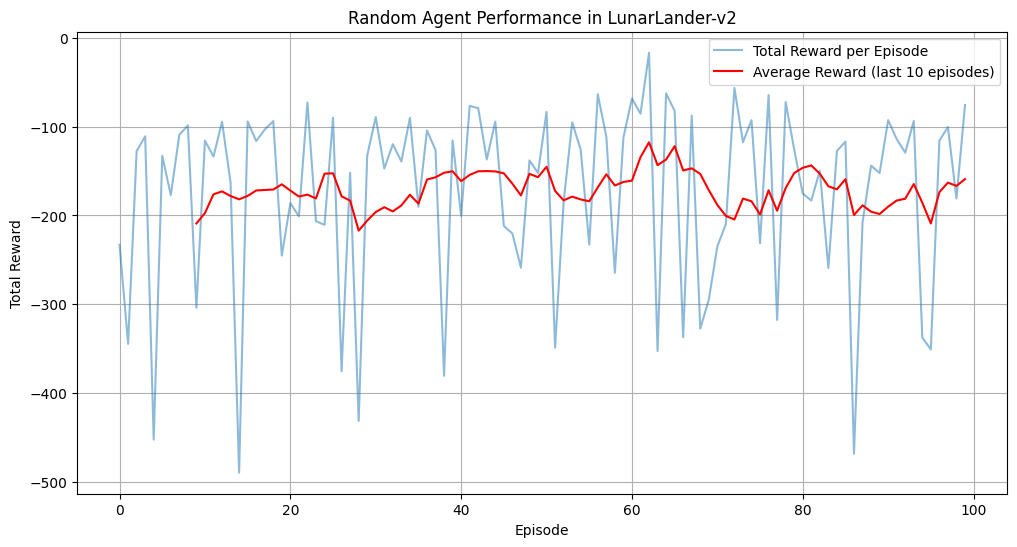

In [3]:
def random_agent(env, num_episodes=100):
    scores = []
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            # Select a random action
            action = env.action_space.sample()
            state, reward, done, info,_ = env.step(action)
            total_reward += reward
        
        scores.append(total_reward)
    
    return scores

def plot_results(scores,num_episodes,env_name):
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(scores, label='Total Reward per Episode', alpha=0.5)
    plt.plot(range(9, num_episodes), avg_scores, label='Average Reward (last 10 episodes)', color='red')
    plt.title(f'Random Agent Performance in {env_name}')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.grid()
    plt.show()

        
if __name__ == "__main__":
    env = gym.make(env_name, render_mode="rgb_array")
    
    print("State Space:", env.observation_space)
    print("State Space Shape:", env.observation_space.shape)
    print("State Space High:", env.observation_space.high)
    print("State Space Low:", env.observation_space.low)
    
    print("Action Space:", env.action_space)
    print("Number of Actions:", env.action_space.n)
    
    scores = random_agent(env, num_episodes)

    # Calculate average scores over the last 10 episodes for smoothing
    avg_scores = np.convolve(scores, np.ones(10)/10, mode='valid')

    plot_results(scores,num_episodes,env_name)
    env.close()


# Observations - 

## LunarLander V2

The state space of LunarLander is an 8-dimensional continuous space: [x position, y position, x velocity, y velocity, angle, angular velocity, left leg contact, right leg contact].

The action space is discrete with four possible actions:
```
0 = Do nothing
1 = Fire left engine
2 = Fire main engine
3 = Fire right engine
```
## Random Agent
This agent samples actions randomly from the action space and executes them, which means it has no control strategy.

**Reward**: The LunarLander environment provides rewards based on specific goals and penalties:

    Reward of +100 to +140 for successfully landing.
    Reward is higher for landing with both legs touching down.
    Penalty for crashing (large negative reward).
    Small reward/penalty adjustments based on proximity to the landing pad, velocity, angle, and fuel usage.


**Behavior of Random Agent** :

```The random agent typically ends up crashing, resulting in large negative rewards. Occasionally, it may achieve minor positive rewards by chance when it stays closer to the center or slows its descent.```
The total reward varies widely, usually ending up negative, as random actions generally lead to an unstable descent or crash.


##  1(a).2 CartPoleV0 with Random Agent

State Space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
State Space Shape: (4,)
State Space High: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
State Space Low: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
Action Space: Discrete(2)
Number of Actions: 2


/Users/abhjha8/ml_projects/assignment3/venv/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


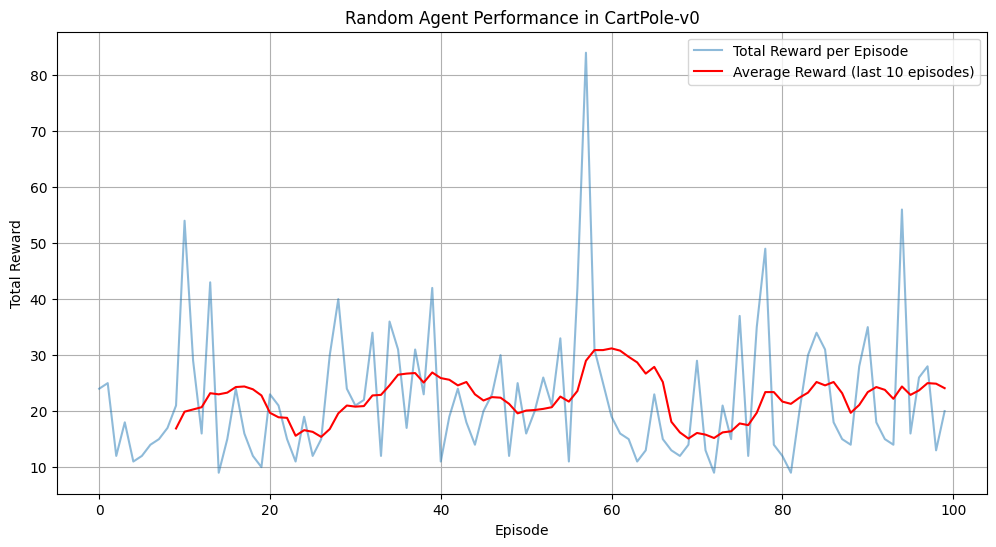

In [4]:
# for generating results for CartpoleV0 
if __name__ == "__main__":
    env_name = "CartPole-v0"
    env = gym.make(env_name, render_mode="rgb_array")
    
    print("State Space:", env.observation_space)
    print("State Space Shape:", env.observation_space.shape)
    print("State Space High:", env.observation_space.high)
    print("State Space Low:", env.observation_space.low)
    
    print("Action Space:", env.action_space)
    print("Number of Actions:", env.action_space.n)
    
    scores = random_agent(env, num_episodes)

    # Calculate average scores over the last 10 episodes for smoothing
    avg_scores = np.convolve(scores, np.ones(10)/10, mode='valid')

    plot_results(scores,num_episodes,env_name)

    env.close()


# Observations - 

## CartPole V0
The state space of CartPole is a 4-dimensional continuous space: [position of cart, velocity of cart, angle of pole, rotation rate of pole].
The **action space** is discrete with two possible actions:
0 = Move the cart left
1 = Move the cart right
The CartPole environment provides a reward of 1 for each time step the pole remains balanced.

## Random Agent:
The random agent samples actions from the action space  and executes them without regard to the current state.
**Reward**: In CartPole, each time step in which the pole remains upright gives a reward of 1. The episode ends when the pole falls or the cart moves too far from the center.

```Since the agent is acting randomly, it tends to balance the pole only briefly, usually leading to low rewards (between 10 and 50 in most cases, but varies).```
High rewards (close to the maximum of 200) would require consistent corrective actions, which random sampling rarely achieves.

# Q2(b) Implementation of Policy Gradient Algorithm

Implement the policy gradient algorithm with and without the reward to go and advantage normalization functionality.


In [5]:
# Code of Policy Gradient Network (PGN).
# To implement neural layers.
# To implement activation functions.
# To optimize the weights.

class PGN(nn.Module):
    def __init__(self, learning_rate, input_size, actions_num, model_file):
        super(PGN, self).__init__() #5
        self.fcl1 = nn.Linear(*input_size, 128) #6 
        self.fcl2 = nn.Linear(128, 128)
        self.fcl3 = nn.Linear(128, actions_num)
        self.optimizer = optim.Adam(self.parameters(), lr = learning_rate)
        self.device = T.device("cuda:0" if T.cuda.is_available() else "cpu")
        self.to(self.device) #7 
        self.model_file = model_file
            
    def forward(self, state):
        x = F.relu(self.fcl1(state))
        x = F.relu(self.fcl2(x))
        x = self.fcl3(x)
        return x        
    
    def save_model(self):
        # print(f'Saving {self.model_file}...')
        T.save(self.state_dict(), self.model_file)

    def load_model(self):
        print(f'Loading {self.model_file}...')
        self.load_state_dict(T.load(self.model_file, map_location = T.device('cpu')))


In [6]:

class PG_Agent():
    def __init__(self, learning_rate, gamma, input_size, actions_num, model_file, reward_to_go=False, advantage_normalization=False,baseline_type="time-dependent"):
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.reward_memory = []
        self.action_memory = []
        self.PGN = PGN(learning_rate, input_size, actions_num, model_file)
        self.reward_to_go = reward_to_go
        self.advantage_normalization = advantage_normalization
        self.baseline_type = baseline_type
        
    def store_reward(self, reward):
        self.reward_memory.append(reward)
        
    def store_action(self, action):
        self.action_memory.append(action)
        
    def act(self, state):
        state = T.tensor([state], dtype=T.float).to(self.PGN.device)
        action_values = self.PGN.forward(state)
        action_probabilities = F.softmax(action_values, dim=-1)
        actions_chances = T.distributions.Categorical(action_probabilities)
        action = actions_chances.sample()
        action_log = actions_chances.log_prob(action)
        self.store_action(action_log)     
        
        return action.item()
        
    def learn(self):
        self.PGN.optimizer.zero_grad()
    
        # Compute returns (reward-to-go if enabled)
        G_t = np.zeros_like(self.reward_memory, dtype=np.float64)
        if self.reward_to_go:
            for t in range(len(self.reward_memory)):
                G_t_sum = 0
                discount = 1
                for k in range(t, len(self.reward_memory)):
                    G_t_sum += self.reward_memory[k] * discount
                    discount *= self.gamma
                G_t[t] = G_t_sum
        else:
            G_t_sum = sum([self.reward_memory[k] * (self.gamma ** k) for k in range(len(self.reward_memory))])
            G_t[:] = G_t_sum
    
        # Convert G_t to tensor and apply baseline if advantage normalization is enabled
        G_t = T.tensor(G_t, dtype=T.float).to(self.PGN.device)
    
        if self.advantage_normalization:
            if self.baseline_type == "time-dependent":
                # Time-dependent baseline: subtract the average return at each time step
                baseline = np.cumsum(self.reward_memory) / (np.arange(len(self.reward_memory)) + 1)
                baseline = T.tensor(baseline, dtype=T.float).to(self.PGN.device)
                G_t = G_t - baseline  # Subtract baseline
    
            # Normalize the advantage (after applying baseline)
            G_t = (G_t - G_t.mean()) / (G_t.std() + 1e-8)
    
        # Compute policy gradient loss
        loss = 0
        for g_t_, log_probability in zip(G_t, self.action_memory):
            loss += -g_t_ * log_probability
    
        loss.backward()
        self.PGN.optimizer.step()
    
        # Clear memory
        self.action_memory = []
        self.reward_memory = []


In [7]:
# Plot results with reward-to-go and advantage normalization flags
def plot_learning_curve(env_name,reward_records, file, reward_to_go, advantage_normalization,batch_size):
    # Generate recent 100 interval average
    average_reward = []
    for idx in range(len(reward_records)):
        if idx < 100:
            avg_list = reward_records[:idx + 1]
        else:
            avg_list = reward_records[idx - 99:idx + 1]
        average_reward.append(np.mean(avg_list))

    # Determine plot title based on settings
    title = f"Learning Curve for Policy Gradient for {env_name}"
    subtitle = f"Reward-to-Go: {'True' if reward_to_go else 'False'}, " \
               f"Advantage Normalization: {'True' if advantage_normalization else 'False'},"\
               f"Batch size: {batch_size}"

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(reward_records, label='Total Rewards per Episode', alpha=0.5)
    plt.plot(average_reward, label='100-Episode Average Reward', color='orange')
    plt.title(f"{title}\n{subtitle}")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.grid()
    plt.savefig(file)
    plt.show()


##  Parameters
Change the parameters as you like and the environment for preparing the results for environments CartPoleV0 and LunarLanderV2

In [8]:
# Parameters
gamma = 0.99
mode = "train"
# env_name = "LunarLander-v2" # to prepare the results for Lunar Lander
reward_to_go=True
advantage_normalization=True
env_name = "CartPole-v0"
baseline_type = "time-dependent"
batch_size = 5  # Number of episodes per batch


current_dir = "/Users/abhjha8/ml_projects/openai_gym/assignment_3/Q2/training_outputs"
current_dir = os.path.join(os.getcwd(),"training_outputs")
if not os.path.exists(os.path.join(current_dir,"models")):
    os.makedirs(os.path.join(current_dir,"models"))
if not os.path.exists(os.path.join(current_dir,"plots")):
    os.makedirs(os.path.join(current_dir,"plots"))

In [9]:
def generate_results(env_name,input_dims,n_actions,learning_rate,num_games,batch_size,gamma,\
                     reward_to_go,advantage_normalization,baseline_type="time-dependent"):
    
    file_name = "PG_" + env_name + "_" + str(learning_rate) + "_" + str(num_games)+\
                "_rtg_"+str(reward_to_go)+"_adv_"+str(advantage_normalization)+"_batch_size_"+str(batch_size)
    
    scores_plot_file = os.path.join(current_dir, "plots", file_name + ".png")
    model_file = os.path.join(current_dir, "models", file_name)

    # Initialize agent with reward-to-go and advantage normalization options
    agent = PG_Agent(learning_rate, gamma=0.99, input_size=input_dims, actions_num=n_actions, model_file=model_file, 
                     reward_to_go=reward_to_go, advantage_normalization=advantage_normalization, baseline_type="time-dependent")
    
    mode = "train"  # Select among {"train", "test"}

    if mode == "train": 
        scores = []
        best_avg_score = -np.inf

        batch_rewards = []
        batch_actions = []
        
        for t in range(num_games):
            done = False
            score = 0
            state = env.reset()[0]
            step = 0
            episode_rewards = []
            while not done:
                step += 1
                action = agent.act(state)
                state_, reward, done, info, _ = env.step(action)
                score += reward 
                episode_rewards.append(reward)  # Store episode rewards
                agent.store_reward(reward)
                state = state_
                if step >= env_max_num_steps:
                    done = True
            
            # Store the rewards for the batch
            batch_rewards.append(episode_rewards)
            scores.append(score)
            
            # If batch size is reached, update the policy
            if (t + 1) % batch_size == 0:
                agent.learn()  # Learn after batch of episodes
                agent.reward_memory = []  # Clear rewards after learning

            avg_score = np.mean(scores[-100:])
            print("Episode", t, "- score %.2f" % score, "- avg_score %.2f" % avg_score)
            
            # Save the model if the average score improves
            if avg_score > best_avg_score:
                agent.PGN.save_model()
                best_avg_score = avg_score

        plot_learning_curve(env_name, scores, scores_plot_file, reward_to_go=reward_to_go,\
                            advantage_normalization=advantage_normalization,batch_size=batch_size)


/var/folders/fs/1_sgn68n2914x1m2zltpc2m80000gn/T/ipykernel_1354/4126726575.py:19: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:281.)
  state = T.tensor([state], dtype=T.float).to(self.PGN.device)
/Users/abhjha8/ml_projects/assignment3/venv/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 0 - score 10.00 - avg_score 10.00
Episode 1 - score 24.00 - avg_score 17.00
Episode 2 - score 34.00 - avg_score 22.67
Episode 3 - score 31.00 - avg_score 24.75
Episode 4 - score 14.00 - avg_score 22.60
Episode 5 - score 22.00 - avg_score 22.50
Episode 6 - score 30.00 - avg_score 23.57
Episode 7 - score 20.00 - avg_score 23.12
Episode 8 - score 30.00 - avg_score 23.89
Episode 9 - score 23.00 - avg_score 23.80
Episode 10 - score 29.00 - avg_score 24.27
Episode 11 - score 75.00 - avg_score 28.50
Episode 12 - score 14.00 - avg_score 27.38
Episode 13 - score 18.00 - avg_score 26.71
Episode 14 - score 26.00 - avg_score 26.67
Episode 15 - score 24.00 - avg_score 26.50
Episode 16 - score 13.00 - avg_score 25.71
Episode 17 - score 9.00 - avg_score 24.78
Episode 18 - score 30.00 - avg_score 25.05
Episode 19 - score 31.00 - avg_score 25.35
Episode 20 - score 15.00 - avg_score 24.86
Episode 21 - score 19.00 - avg_score 24.59
Episode 22 - score 11.00 - avg_score 24.00
Episode 23 - score 21.

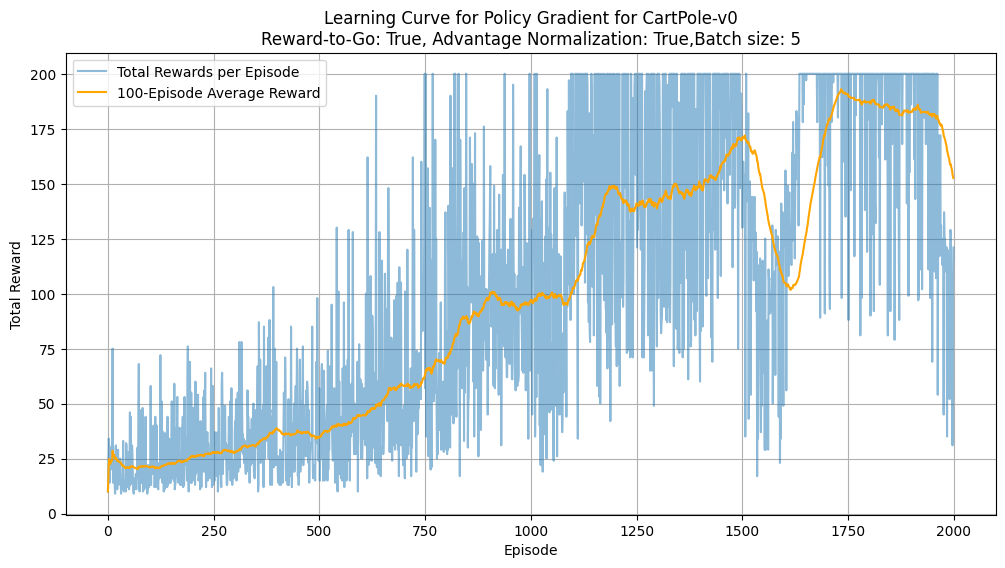

In [10]:
if __name__ == "__main__":
    
    env = gym.make(env_name, render_mode="rgb_array")
    
    # Configure environment and agent parameters based on environment
    if env_name == "LunarLander-v2":
        env_max_num_steps = 1000
        input_dims = [8]  # LunarLander state has 8 dimensions
        n_actions = 4     # LunarLander has 4 discrete actions
        num_games = 2000
        learning_rate = 0.0005
    elif env_name == "CartPole-v0":
        env_max_num_steps = 200
        input_dims = [4]  # CartPole state has 4 dimensions
        n_actions = 2     # CartPole has 2 discrete actions (left or right)
        num_games = 2000
        learning_rate = 0.001
    else:
        raise ValueError("Unsupported environment")

    generate_results(env_name,input_dims,n_actions,learning_rate,num_games,batch_size=5,gamma=0.99,\
                     reward_to_go=reward_to_go,advantage_normalization=advantage_normalization,baseline_type="time-dependent")
    
    


# Q1(c).Batch size comparison

Study and report the impact of batch size on the policy gradient estimates on these environments.

In [11]:
batch_size_list = [5,10,20,50]

env_name = "CartPole-v0"

/Users/abhjha8/ml_projects/assignment3/venv/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


Preparing Results for batch size 5
Episode 0 - score 19.00 - avg_score 19.00
Episode 1 - score 15.00 - avg_score 17.00
Episode 2 - score 20.00 - avg_score 18.00
Episode 3 - score 12.00 - avg_score 16.50
Episode 4 - score 23.00 - avg_score 17.80
Episode 5 - score 30.00 - avg_score 19.83
Episode 6 - score 15.00 - avg_score 19.14
Episode 7 - score 18.00 - avg_score 19.00
Episode 8 - score 10.00 - avg_score 18.00
Episode 9 - score 36.00 - avg_score 19.80
Episode 10 - score 48.00 - avg_score 22.36
Episode 11 - score 18.00 - avg_score 22.00
Episode 12 - score 14.00 - avg_score 21.38
Episode 13 - score 21.00 - avg_score 21.36
Episode 14 - score 36.00 - avg_score 22.33
Episode 15 - score 28.00 - avg_score 22.69
Episode 16 - score 19.00 - avg_score 22.47
Episode 17 - score 17.00 - avg_score 22.17
Episode 18 - score 20.00 - avg_score 22.05
Episode 19 - score 35.00 - avg_score 22.70
Episode 20 - score 21.00 - avg_score 22.62
Episode 21 - score 13.00 - avg_score 22.18
Episode 22 - score 9.00 - avg

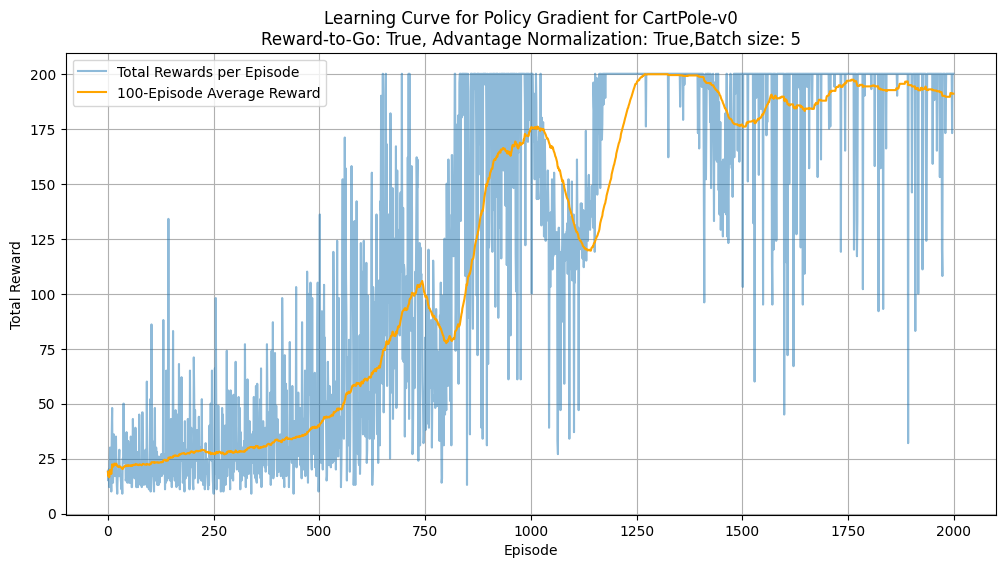

Preparing Results for batch size 10
Episode 0 - score 15.00 - avg_score 15.00
Episode 1 - score 10.00 - avg_score 12.50
Episode 2 - score 22.00 - avg_score 15.67
Episode 3 - score 27.00 - avg_score 18.50
Episode 4 - score 26.00 - avg_score 20.00
Episode 5 - score 9.00 - avg_score 18.17
Episode 6 - score 27.00 - avg_score 19.43
Episode 7 - score 13.00 - avg_score 18.62
Episode 8 - score 12.00 - avg_score 17.89
Episode 9 - score 20.00 - avg_score 18.10
Episode 10 - score 27.00 - avg_score 18.91
Episode 11 - score 17.00 - avg_score 18.75
Episode 12 - score 14.00 - avg_score 18.38
Episode 13 - score 23.00 - avg_score 18.71
Episode 14 - score 16.00 - avg_score 18.53
Episode 15 - score 21.00 - avg_score 18.69
Episode 16 - score 19.00 - avg_score 18.71
Episode 17 - score 24.00 - avg_score 19.00
Episode 18 - score 23.00 - avg_score 19.21
Episode 19 - score 25.00 - avg_score 19.50
Episode 20 - score 17.00 - avg_score 19.38
Episode 21 - score 11.00 - avg_score 19.00
Episode 22 - score 13.00 - av

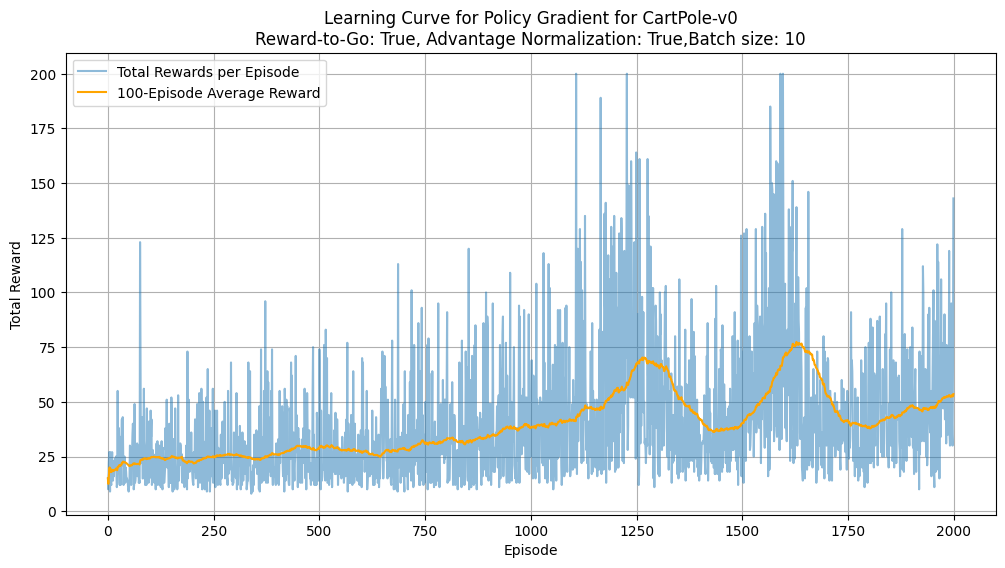

Preparing Results for batch size 20
Episode 0 - score 16.00 - avg_score 16.00
Episode 1 - score 13.00 - avg_score 14.50
Episode 2 - score 19.00 - avg_score 16.00
Episode 3 - score 19.00 - avg_score 16.75
Episode 4 - score 38.00 - avg_score 21.00
Episode 5 - score 32.00 - avg_score 22.83
Episode 6 - score 21.00 - avg_score 22.57
Episode 7 - score 21.00 - avg_score 22.38
Episode 8 - score 19.00 - avg_score 22.00
Episode 9 - score 20.00 - avg_score 21.80
Episode 10 - score 15.00 - avg_score 21.18
Episode 11 - score 19.00 - avg_score 21.00
Episode 12 - score 17.00 - avg_score 20.69
Episode 13 - score 15.00 - avg_score 20.29
Episode 14 - score 11.00 - avg_score 19.67
Episode 15 - score 14.00 - avg_score 19.31
Episode 16 - score 15.00 - avg_score 19.06
Episode 17 - score 47.00 - avg_score 20.61
Episode 18 - score 82.00 - avg_score 23.84
Episode 19 - score 15.00 - avg_score 23.40
Episode 20 - score 36.00 - avg_score 24.00
Episode 21 - score 17.00 - avg_score 23.68
Episode 22 - score 21.00 - a

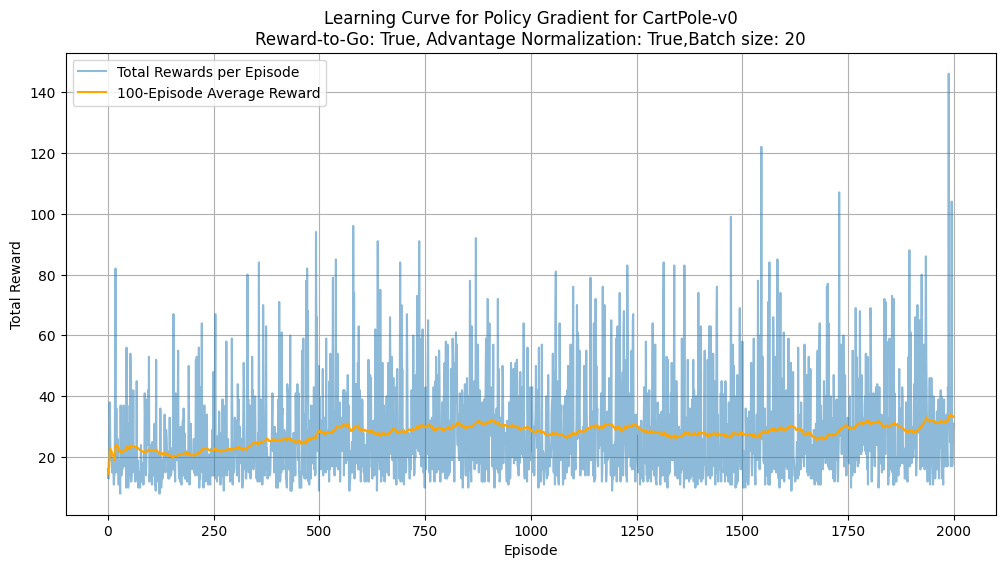

Preparing Results for batch size 50
Episode 0 - score 19.00 - avg_score 19.00
Episode 1 - score 16.00 - avg_score 17.50
Episode 2 - score 8.00 - avg_score 14.33
Episode 3 - score 46.00 - avg_score 22.25
Episode 4 - score 26.00 - avg_score 23.00
Episode 5 - score 10.00 - avg_score 20.83
Episode 6 - score 14.00 - avg_score 19.86
Episode 7 - score 17.00 - avg_score 19.50
Episode 8 - score 24.00 - avg_score 20.00
Episode 9 - score 47.00 - avg_score 22.70
Episode 10 - score 48.00 - avg_score 25.00
Episode 11 - score 16.00 - avg_score 24.25
Episode 12 - score 35.00 - avg_score 25.08
Episode 13 - score 61.00 - avg_score 27.64
Episode 14 - score 49.00 - avg_score 29.07
Episode 15 - score 23.00 - avg_score 28.69
Episode 16 - score 12.00 - avg_score 27.71
Episode 17 - score 21.00 - avg_score 27.33
Episode 18 - score 31.00 - avg_score 27.53
Episode 19 - score 9.00 - avg_score 26.60
Episode 20 - score 54.00 - avg_score 27.90
Episode 21 - score 15.00 - avg_score 27.32
Episode 22 - score 13.00 - avg

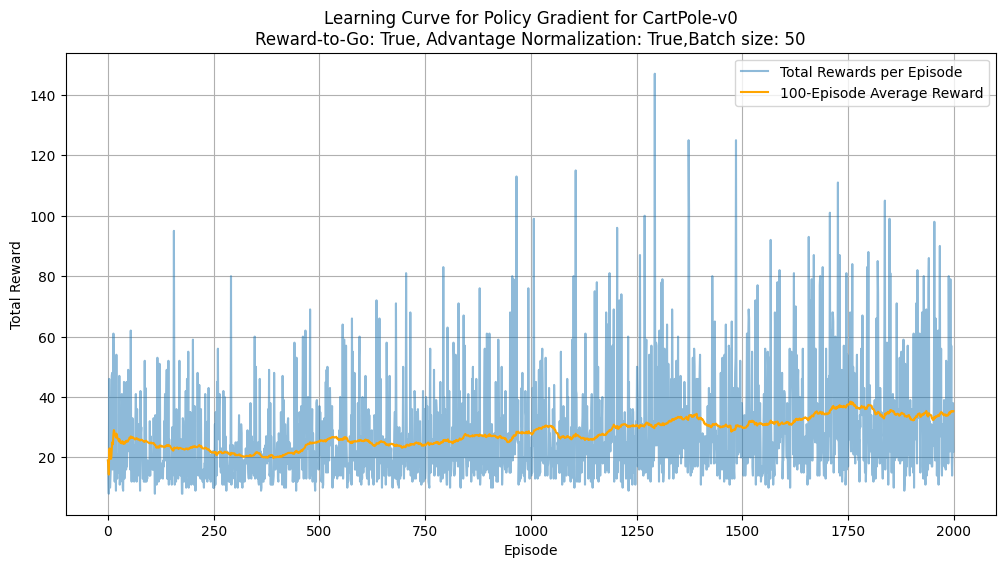

In [12]:
if __name__ == "__main__":
    
    env = gym.make(env_name, render_mode="rgb_array")

    # Configure environment and agent parameters based on environment
    if env_name == "LunarLander-v2":
        env_max_num_steps = 1000
        input_dims = [8]  # LunarLander state has 8 dimensions
        n_actions = 4     # LunarLander has 4 discrete actions
        num_games = 5000
        learning_rate = 0.0005
    elif env_name == "CartPole-v0":
        env_max_num_steps = 200
        input_dims = [4]  # CartPole state has 4 dimensions
        n_actions = 2     # CartPole has 2 discrete actions (left or right)
        num_games = 2000
        learning_rate = 0.001
    else:
        raise ValueError("Unsupported environment")

    for batch_size in batch_size_list:
        print(f"Preparing Results for batch size {batch_size}")
        generate_results(env_name,input_dims,n_actions,learning_rate,num_games,batch_size=batch_size,gamma=0.99,\
                     reward_to_go=True,advantage_normalization=True,baseline_type="time-dependent")
    
    
